In [48]:
# Suggestions:
# Create a loop to plot the clusters for -> each column; each k value; each random state
# Iterate through each cluster applying Feature Scaling and Normalisation

import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("diabetes-after-full-clean-noindex.csv",dtype={'encounter_id': 'int64', 'patient_nbr': 'int64', 'race': 'category', 'gender': 'category', 'age': 'category', 'weight': 'category', 'admission_type_id': 'category', 'discharge_disposition_id': 'category', 'admission_source_id': 'category', 'time_in_hospital': 'int64', 'payer_code': 'category', 'medical_specialty': 'category', 'num_lab_procedures': 'int64', 'num_procedures': 'int64', 'num_medications': 'int64', 'number_outpatient': 'int64', 'number_emergency': 'int64', 'number_inpatient': 'int64', 'diag_1': 'category', 'diag_2': 'category', 'diag_3': 'category', 'number_diagnoses': 'int64', 'max_glu_serum': 'category', 'A1Cresult': 'category', 'metformin': 'category', 'repaglinide': 'category', 'nateglinide': 'category', 'chlorpropamide': 'category', 'glimepiride': 'category', 'acetohexamide': 'category', 'glipizide': 'category', 'glyburide': 'category', 'tolbutamide': 'category', 'pioglitazone': 'category', 'rosiglitazone': 'category', 'acarbose': 'category', 'miglitol': 'category', 'troglitazone': 'category', 'tolazamide': 'category', 'examide': 'category', 'citoglipton': 'category', 'insulin': 'category', 'glyburide-metformin': 'category', 'glipizide-metformin': 'category', 'glimepiride-pioglitazone': 'category', 'metformin-rosiglitazone': 'category', 'metformin-pioglitazone': 'category', 'change': 'category', 'diabetesMed': 'category', 'readmitted': 'category'}, usecols=range(1, 50))

In [3]:
# Run 1: Not scaled; Standardised; k = 2; analysing the mean

In [4]:
#Make a copy of DF
df_tr = df

In [6]:
#Standardize
clmns = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient', 'number_diagnoses']
df_tr_std = stats.zscore(df_tr[clmns])

In [56]:
#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=5).fit(df_tr_std)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [7]:
labels = kmeans.labels_

In [8]:
#Glue back to original data
df_tr['clusters'] = labels

In [9]:
#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
print (df_tr[clmns].groupby(['clusters']).mean())

          time_in_hospital  num_lab_procedures  num_procedures  \
clusters                                                         
0                 7.026815           54.992547        2.150130   
1                 2.975044           36.669976        0.902023   

          num_medications  number_outpatient  number_emergency  \
clusters                                                         
0               22.718092           0.504413          0.282888   
1               12.405118           0.296412          0.151899   

          number_inpatient  number_diagnoses  
clusters                                      
0                 0.937236          8.382639  
1                 0.472630          6.904082  


Text(27.6882,0.5,'Number of Diagnoses')

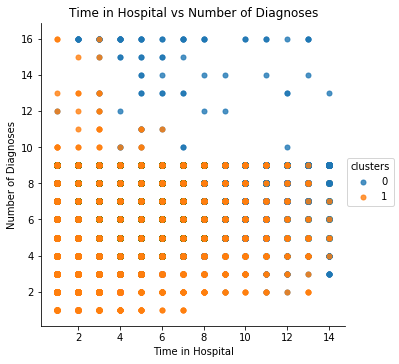

In [10]:
#Scatter plot
sns.lmplot('time_in_hospital', 'number_diagnoses', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 25})
plt.title('Time in Hospital vs Number of Diagnoses')
plt.xlabel('Time in Hospital')
plt.ylabel('Number of Diagnoses')

In [11]:
# Run 2: Scaled; Not standardised; k = 2

In [12]:
#Make a copy of DF
#scaler = MinMaxScaler()
#df_tr2 = scaler.fit_transform(df.filter(['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient', 'number_diagnoses']))

df_tr2 = df

In [13]:
#Standardize
clmns2 = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient', 'number_diagnoses']
df_tr_std2 = df_tr2[clmns2]

In [14]:
#Cluster the data
kmeans2 = KMeans(n_clusters=3, random_state=5).fit(df_tr_std2)
labels2 = kmeans2.labels_

In [15]:
#Glue back to original data
df_tr2['clusters'] = labels2

In [16]:
#Add the column into our list
clmns2.extend(['clusters'])

#Lets analyze the clusters
print (df_tr2[clmns2].groupby(['clusters']).mean())

          time_in_hospital  num_lab_procedures  num_procedures  \
clusters                                                         
0                 5.728752           64.229571        1.494202   
1                 3.323647           13.409939        1.246565   
2                 3.939776           41.167996        1.273831   

          num_medications  number_outpatient  number_emergency  \
clusters                                                         
0               19.252094           0.401348          0.204377   
1               13.454317           0.443333          0.215338   
2               14.902925           0.316680          0.186071   

          number_inpatient  number_diagnoses  
clusters                                      
0                 0.691962          7.896673  
1                 0.529429          7.149830  
2                 0.641687          7.214864  


Text(27.6717,0.5,'Number of Medications')

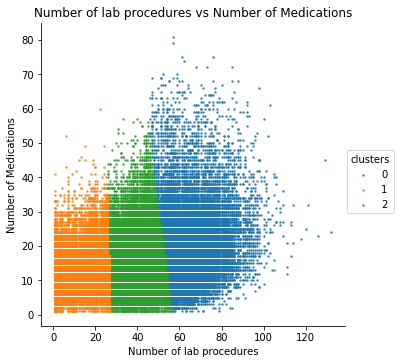

In [17]:
#Scatter plot
sns.lmplot('num_lab_procedures', 'num_medications', 
           data=df_tr2, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "o", 
                        "s": 2})
plt.title('Number of lab procedures vs Number of Medications')
plt.xlabel('Number of lab procedures')
plt.ylabel('Number of Medications')

# ANALYSIS:
# just one cluster
# DBSCAN may be a better option
# Lot of outliers and high density towards the low end of each axis

Text(27.6717,0.5,'Number of Medications')

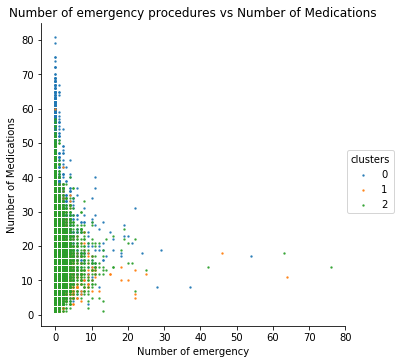

In [18]:
#Scatter plot
sns.lmplot('number_emergency', 'num_medications', 
           data=df_tr2, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "o", 
                        "s": 2})
plt.title('Number of emergency procedures vs Number of Medications')
plt.xlabel('Number of emergency')
plt.ylabel('Number of Medications')

# ANALYSIS:
# DBSCAN may be a better option
# Might be a good idea to get rid of some outliers and re-run

Text(27.6717,0.5,'Number of Medications')

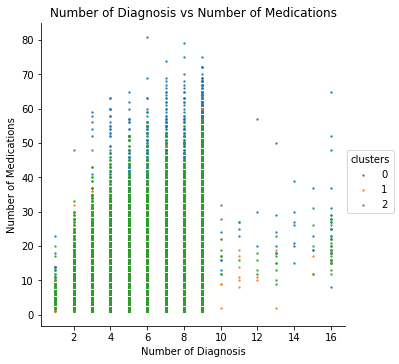

In [19]:
#Scatter plot
sns.lmplot('number_diagnoses', 'num_medications', 
           data=df_tr2, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "o", 
                        "s": 2})
plt.title('Number of Diagnosis vs Number of Medications')
plt.xlabel('Number of Diagnosis')
plt.ylabel('Number of Medications')

# ANALYSIS:
# Atleast 2 clusters present. One where the no. of diagnosis =< 9 and one where no. of diagnosis > 9

Text(27.6882,0.5,'Number of Inpatients')

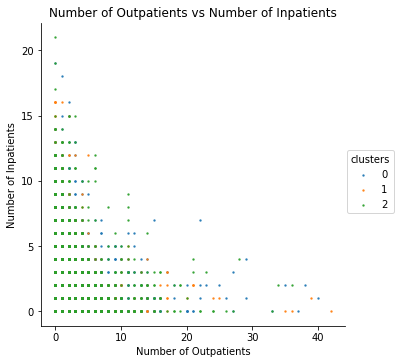

In [20]:
#Scatter plot
sns.lmplot('number_outpatient', 'number_inpatient', 
           data=df_tr2, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "o", 
                        "s": 2})
plt.title('Number of Outpatients vs Number of Inpatients')
plt.xlabel('Number of Outpatients')
plt.ylabel('Number of Inpatients')

# Analysis
# Possibly 2 clusters present

Text(27.6882,0.5,'Time in hospital')

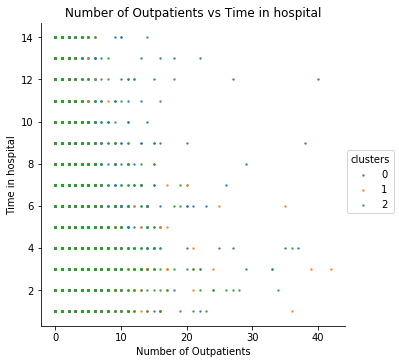

In [21]:
#Scatter plot
sns.lmplot('number_outpatient', 'time_in_hospital', 
           data=df_tr2, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "o", 
                        "s": 2})
plt.title('Number of Outpatients vs Time in hospital')
plt.xlabel('Number of Outpatients')
plt.ylabel('Time in hospital')

Text(27.6882,0.5,'Time in hospital')

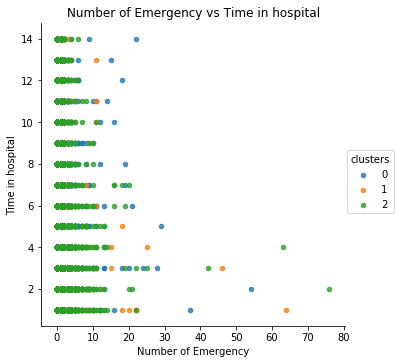

In [22]:
#Scatter plot
sns.lmplot('number_emergency', 'time_in_hospital', 
           data=df_tr2, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "o", 
                        "s": 20})
plt.title('Number of Emergency vs Time in hospital')
plt.xlabel('Number of Emergency')
plt.ylabel('Time in hospital')

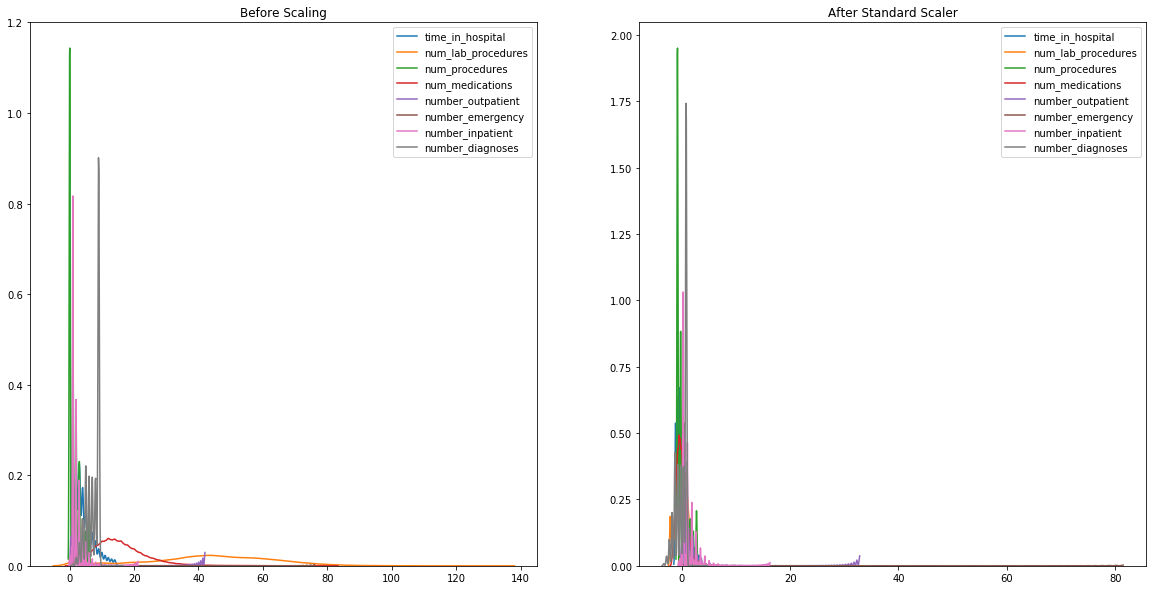

In [44]:
# Feature Scaling using standard scalar
# Clearly outliers are having an impact on dataset even after feature scaling.
# http://benalexkeen.com/feature-scaling-with-scikit-learn/

dfs = df.filter(['time_in_hospital','num_lab_procedures','num_procedures',
                                                   'num_medications','number_outpatient','number_emergency',
                                                   'number_inpatient', 'number_diagnoses'])

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(dfs)
scaled_df = pd.DataFrame(scaled_df, columns=['time_in_hospital','num_lab_procedures','num_procedures',
                                                   'num_medications','number_outpatient','number_emergency',
                                                   'number_inpatient', 'number_diagnoses'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

ax1.set_title('Before Scaling')
for column in dfs:
    sns.kdeplot(dfs[column], ax=ax1)

ax2.set_title('After Standard Scaler')
for column in scaled_df:
    sns.kdeplot(scaled_df[column], ax=ax2)    
    
plt.show()

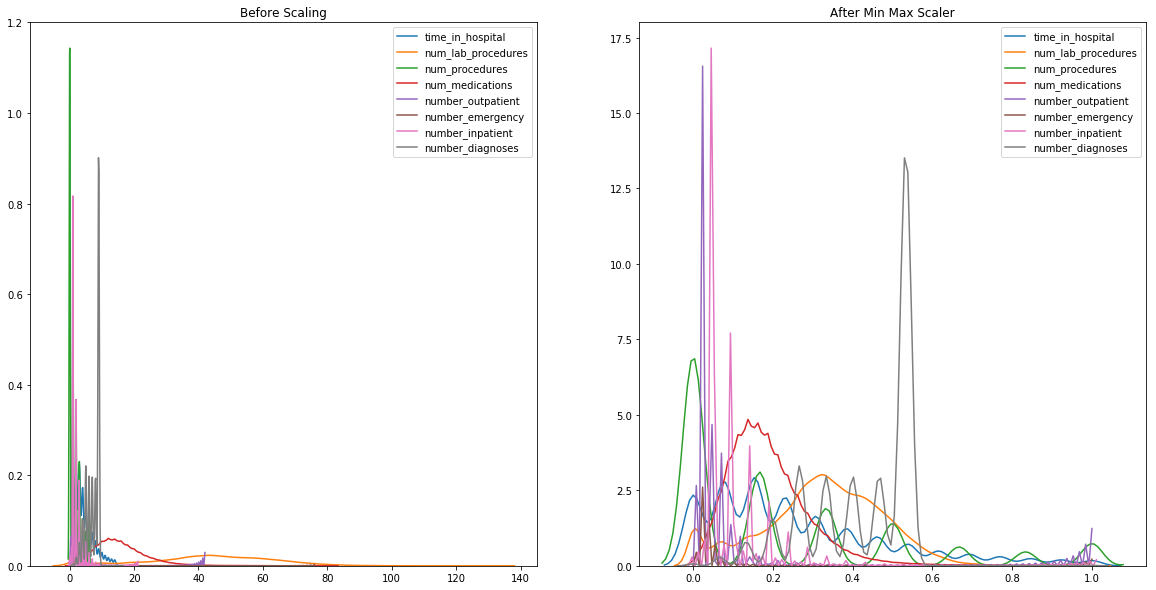

In [46]:
# Feature Scaling using Min Max Scalar
# Min Max Scaler looks good

dfs = df.filter(['time_in_hospital','num_lab_procedures','num_procedures',
                                                   'num_medications','number_outpatient','number_emergency',
                                                   'number_inpatient', 'number_diagnoses'])

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(dfs)
scaled_df = pd.DataFrame(scaled_df, columns=['time_in_hospital','num_lab_procedures','num_procedures',
                                                   'num_medications','number_outpatient','number_emergency',
                                                   'number_inpatient', 'number_diagnoses'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

ax1.set_title('Before Scaling')
for column in dfs:
    sns.kdeplot(dfs[column], ax=ax1)

ax2.set_title('After Min Max Scaler')
for column in scaled_df:
    sns.kdeplot(scaled_df[column], ax=ax2)    
    
plt.show()

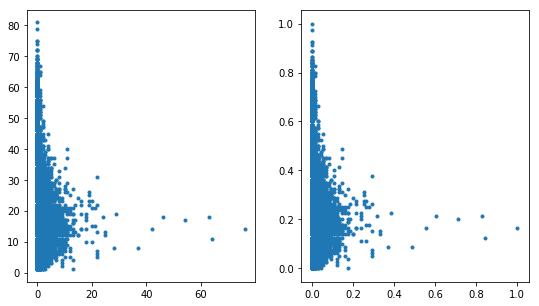

In [54]:
# Plotting after applying Min Max Scaler
# Not a huge noticeable difference

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(dfs['number_emergency'], dfs['num_medications'], marker = '.')
ax2.scatter(scaled_df['number_emergency'], scaled_df['num_medications'], marker = '.')
plt.show()

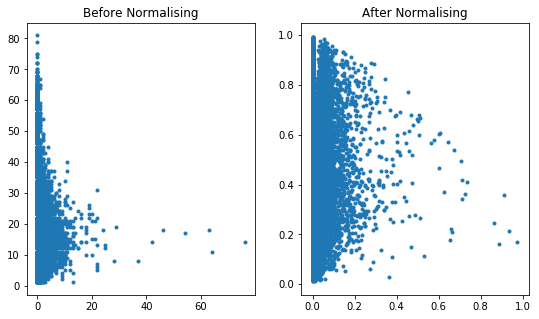

In [57]:
# Plotting after normalising
# Could reveal some interesting patters for the other data

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(dfs)
scaled_df = pd.DataFrame(scaled_df, columns=dfs.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('Before Normalising')
ax1.scatter(dfs['number_emergency'], dfs['num_medications'], marker = '.')
ax2.set_title('After Normalising')
ax2.scatter(scaled_df['number_emergency'], scaled_df['num_medications'], marker = '.')
plt.show()